In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import statsmodels.formula.api as smf 
import seaborn as sns

In [2]:
XYZ=pd.read_csv('delivery_time.csv')
XYZ

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
import pandas as pd
df=XYZ
df['Sorting Time']=df['Sorting Time'].astype(float)
df

,Delivery Time,Sorting Time
0,21.00,10.0
1,13.50,4.0
2,19.75,6.0
3,24.00,9.0
4,29.00,10.0
5,15.35,6.0
6,19.00,7.0
7,9.50,3.0
8,17.90,10.0
9,18.75,9.0


<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

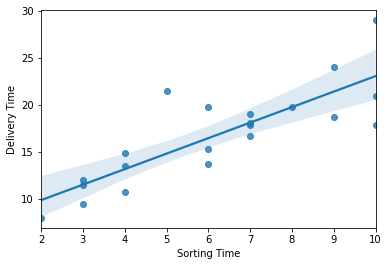

In [4]:
sns.regplot (x="Sorting Time",y="Delivery Time", data=df)

In [5]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     float64
dtypes: float64(2)
memory usage: 464.0 bytes


In [7]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [8]:
delivery_time= df.rename({'Delivery Time': 'Delivery_Time'}, axis=1)

In [9]:
delivery_time1= delivery_time.rename({'Sorting Time': 'Sorting_Time'}, axis=1)
delivery_time1

,Delivery_Time,Sorting_Time
0,21.00,10.0
1,13.50,4.0
2,19.75,6.0
3,24.00,9.0
4,29.00,10.0
5,15.35,6.0
6,19.00,7.0
7,9.50,3.0
8,17.90,10.0
9,18.75,9.0


(array([[0., 0., 2., 3., 4., 4., 4., 2., 1., 1.],
        [7., 8., 6., 0., 0., 0., 0., 0., 0., 0.]]),
 array([ 2. ,  4.7,  7.4, 10.1, 12.8, 15.5, 18.2, 20.9, 23.6, 26.3, 29. ]),
 <a list of 2 BarContainer objects>)

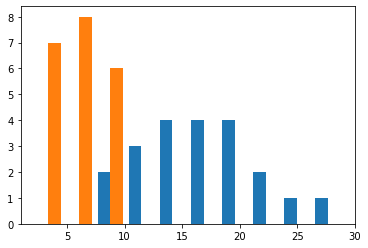

In [10]:
plt.hist(delivery_time1)

{'whiskers': [<matplotlib.lines.Line2D at 0x2140a86edc0>,
 'caps': [<matplotlib.lines.Line2D at 0x2140a87f4c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2140a86ea60>],
 'medians': [<matplotlib.lines.Line2D at 0x2140a87fb80>],
 'fliers': [<matplotlib.lines.Line2D at 0x2140a87fee0>],
 'means': []}

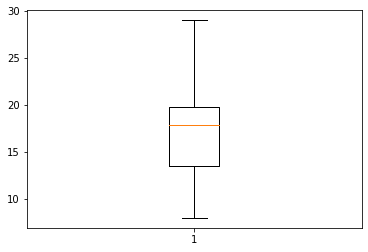

In [11]:
plt.boxplot(delivery_time1.Delivery_Time)


{'whiskers': [<matplotlib.lines.Line2D at 0x2140a8caca0>,
 'caps': [<matplotlib.lines.Line2D at 0x2140a8d83a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2140a8ca940>],
 'medians': [<matplotlib.lines.Line2D at 0x2140a8d8a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x2140a8d8dc0>],
 'means': []}

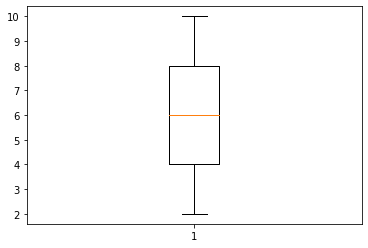

In [12]:
plt.boxplot(delivery_time1.Sorting_Time)

In [13]:
model=smf.ols("Delivery_Time~Sorting_Time",data=delivery_time1).fit()

In [14]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 08 Jun 2021   Prob (F-statistic):           3.98e-06
Time:                        23:00:23   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
pred = model.predict(delivery_time1.iloc[:,1])
pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [17]:
model.resid 
model.resid_pearson 

array([-0.70630355,  0.10943679,  1.11524837,  0.87774154,  2.01950985,
       -0.383949  ,  0.2978383 , -0.69160484, -1.76255624, -0.9110735 ,
        0.01877637, -0.82756157, -0.49264758, -0.0101515 ,  0.17043364,
        0.5796396 , -0.92911167, -0.00540844, -0.64082979, -0.10081191,
        2.27338512])

In [19]:
rmse_lin = np.sqrt(np.mean((np.array(delivery_time1['Delivery_Time'])-np.array(pred))**2))
rmse_lin

2.7916503270617654

Text(0, 0.5, 'Delivery time')

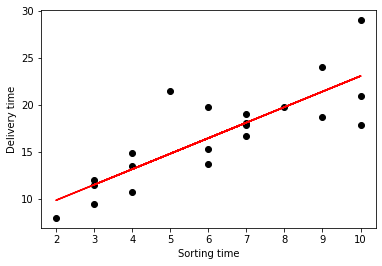

In [20]:
plt.scatter(x=delivery_time1['Sorting_Time'],y=delivery_time1['Delivery_Time'],color='black')
plt.plot(delivery_time1['Sorting_Time'],pred,color='red')
plt.xlabel('Sorting time')
plt.ylabel('Delivery time')

In [20]:
model2 = smf.ols('Delivery_Time~np.log(Sorting_Time)',data=delivery_time1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Tue, 08 Jun 2021   Prob (F-statistic):           2.64e-06
Time:                        23:00:39   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(Sorting_Time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
pred2 = model2.predict(pd.DataFrame(delivery_time1['Sorting_Time']))
pred2

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

In [22]:
rmse_log = np.sqrt(np.mean((np.array(delivery_time1['Delivery_Time'])-np.array(pred2))**2))
rmse_log

2.7331714766820663

Text(0, 0.5, 'Delivery time')

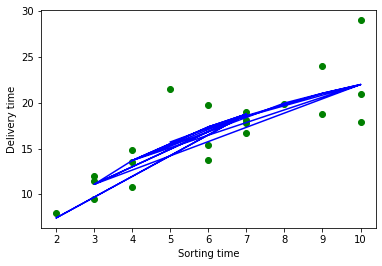

In [23]:
plt.scatter(x=delivery_time1['Sorting_Time'],y=delivery_time1['Delivery_Time'],color='green')
plt.plot(delivery_time1['Sorting_Time'],pred2,color='blue')
plt.xlabel('Sorting time')
plt.ylabel('Delivery time')

In [24]:
model3 = smf.ols('np.log(Delivery_Time)~(Sorting_Time)',data=delivery_time1).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Tue, 08 Jun 2021   Prob (F-statistic):           1.59e-06
Time:                           23:00:52   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
Sorting_Time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
pred_log = model3.predict(pd.DataFrame(delivery_time1['Sorting_Time']))
pred_log

0     3.176888
1     2.543578
2     2.754681
3     3.071336
4     3.176888
5     2.754681
6     2.860233
7     2.438027
8     3.176888
9     3.071336
10    2.965785
11    2.543578
12    2.860233
13    2.438027
14    2.438027
15    2.543578
16    2.754681
17    2.860233
18    2.332475
19    2.860233
20    2.649130
dtype: float64

In [26]:
pred3=np.exp(pred_log)
pred3

0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

In [27]:
rmse_log2 = np.sqrt(np.mean((np.array(delivery_time['Delivery_Time'])-np.array(pred3))**2))
rmse_log2 

2.9402503230562007

Text(0, 0.5, 'Delivery_Time')

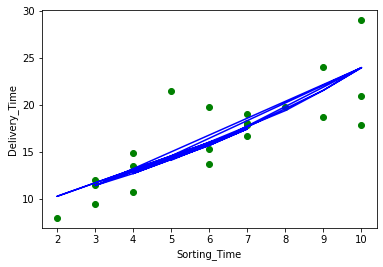

In [28]:
plt.scatter(x=delivery_time1['Sorting_Time'],y=delivery_time1['Delivery_Time'],color='green')
plt.plot(delivery_time1.Sorting_Time,pred3,color='blue')
plt.xlabel('Sorting_Time')
plt.ylabel('Delivery_Time')

In [29]:
resid_3 = model3.resid_pearson 
resid_3

array([-0.75408795,  0.33675889,  1.3016092 ,  0.60797197,  1.08475764,
       -0.13425573,  0.47972269, -1.06383166, -1.66402537, -0.79839415,
        0.12198057, -0.9609301 , -0.26219179,  0.02461332,  0.28130094,
        0.89124014, -0.7613643 ,  0.20640995, -1.44153627,  0.11763994,
        2.38661208])

Text(0, 0.5, 'Standardized Residual')

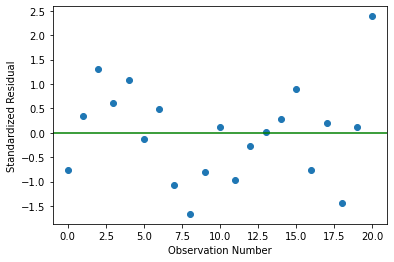

In [30]:
plt.plot(model3.resid_pearson,'o')
plt.axhline(y=0,color='green')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")

Text(0, 0.5, 'Actual')

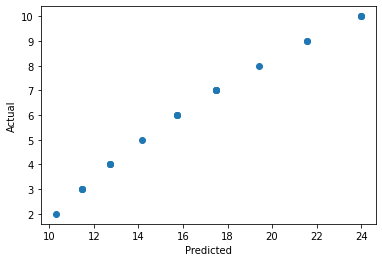

In [31]:
plt.scatter(x=pred3,y=delivery_time1.Sorting_Time)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [32]:
delivery_time1["Sorting_Time_sq"] = delivery_time1.Sorting_Time*delivery_time1.Sorting_Time
delivery_time1

,Delivery_Time,Sorting_Time,Sorting_Time_sq
0,21.00,10.0,100.0
1,13.50,4.0,16.0
2,19.75,6.0,36.0
3,24.00,9.0,81.0
4,29.00,10.0,100.0
5,15.35,6.0,36.0
6,19.00,7.0,49.0
7,9.50,3.0,9.0
8,17.90,10.0,100.0
9,18.75,9.0,81.0


In [33]:
model6 = smf.ols('np.log(Delivery_Time)~(Sorting_Time)+Sorting_Time_sq',data=delivery_time1).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.765
Model:                               OLS   Adj. R-squared:                  0.739
Method:                    Least Squares   F-statistic:                     29.28
Date:                   Tue, 08 Jun 2021   Prob (F-statistic):           2.20e-06
Time:                           23:01:19   Log-Likelihood:                 9.9597
No. Observations:                     21   AIC:                            -13.92
Df Residuals:                         18   BIC:                            -10.79
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.6997      0.228      7.441      0.000       1.220       2.180
Sorting_Time        0.2659      0.080      3.315      0.004       0.097       0.434
Sorting_Time_sq    -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
pred_quad = model6.predict(delivery_time1)
pred6=np.exp(pred_quad)
pred6
rmse_quad = np.sqrt(np.mean((np.array(delivery_time1['Sorting_Time'])-np.array(pred6))**2))
rmse_quad  

10.54989406275058

In [35]:
import matplotlib.pyplot as plt
>>> plt.style.use('dark_background')

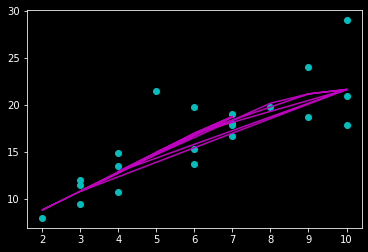

In [36]:
plt.scatter(delivery_time1.Sorting_Time,delivery_time1.Delivery_Time,c="c")
plt.plot(delivery_time1.Sorting_Time,pred6,"m") 

Text(0, 0.5, 'Standardized Residual')

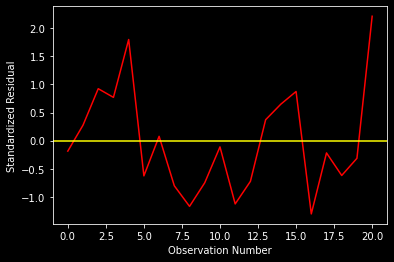

In [37]:
plt.plot(model6.resid_pearson,'r')
plt.axhline(y=0,color='yellow')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")

In [38]:
data = {"MODEL":pd.Series(["rmse_lin","rmse_log","rmse_log2","rmse_quad"]),
        "RMSE_Values":pd.Series([rmse_lin,rmse_log,rmse_log2 ,rmse_quad ]),
        "Rsquare":pd.Series([model.rsquared,model2.rsquared,model3.rsquared,model6.rsquared]),
       "Rsquare_adj":pd.Series([model.rsquared_adj,model2.rsquared_adj,model3.rsquared_adj,model6.rsquared_adj])}
table=pd.DataFrame(data)
table 

,MODEL,RMSE_Values,Rsquare,Rsquare_adj
0,rmse_lin,2.791650,0.682271,0.665549
1,rmse_log,2.733171,0.695443,0.679414
2,rmse_log2,2.940250,0.710948,0.695735
3,rmse_quad,10.549894,0.764867,0.738741
